## 主成分分析

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析用ライブラリ
from sklearn.preprocessing import StandardScaler

## 簡単な例で、主成分分析を行ってみる
### 架空のデータをつくる
### 生徒20人分の数学テスト結果と物理テスト結果

In [2]:
df_test = pd.DataFrame({"math":[41,37,40,30,40,60,46,61,67,68,55,61,59,66,69,54,50,35,80,75],
                                         "physics":[26,32,31,24,60,40,26,27,33,25,26,30,29,37,41,36,31,29,36,34]})
df_test.index.name = "id"
df_test["total"] = df_test["math"]  + df_test["physics"]#点数の合計
df_test

,math,physics,total
id,,,
0,41,26,67
1,37,32,69
2,40,31,71
3,30,24,54
4,40,60,100
5,60,40,100
6,46,26,72
7,61,27,88
8,67,33,100


### 散布図を作成

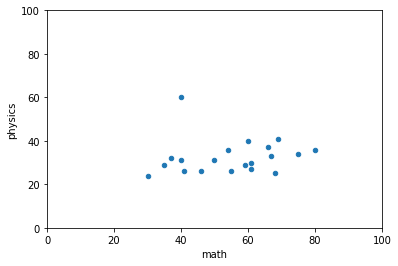

In [3]:
df_test.plot(kind="scatter",x="math",y="physics",xlim=[0,100],ylim=[0,100])

数学テスト結果と物理テスト結果に正の相関が見られる。   
これは、数学のテスト結果があれば、物理のテスト結果を推測できるし、逆に、物理のテスト結果があれば、数学のテスト結果を推測できるということになる。
であれば、この2つの変数を1つにまとめてしまっても元々の情報は損なわれない。  
では、2つの変数(2次元)を1つの変数(1次元)にまとめる(削減)するにはどうすればいいか？  
ここで、主成分分析の登場!

### 主成分分析をやってみよう
### 入力データのセッティング
scikit learnは、この形式で入力データを用意することが多い

In [4]:
X = np.array(df_test[["math","physics"]])
X

array([[41, 26],
       [37, 32],
       [40, 31],
       [30, 24],
       [40, 60],
       [60, 40],
       [46, 26],
       [61, 27],
       [67, 33],
       [68, 25],
       [55, 26],
       [61, 30],
       [59, 29],
       [66, 37],
       [69, 41],
       [54, 36],
       [50, 31],
       [35, 29],
       [80, 36],
       [75, 34]])

### 主成分分析の実行

In [5]:
pca = PCA(n_components=2) #主成分分析用のオブジェクトをつくる。削減後の次元数を引数で指定する。2次元データなので、3以上にするとエラーになる
pca.fit(X) #主成分分析の実行

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 固有ベクトル(主成分の方向を決めるベクトル、基底)

In [6]:
pca.components_

array([[ 0.99634532,  0.0854167 ],
       [-0.0854167 ,  0.99634532]])

### [問]
以下の計算は何を確認しているでしょうか？

In [7]:
print(np.linalg.norm(pca.components_[0]), np.linalg.norm(pca.components_[1]))
np.dot(pca.components_[0], pca.components_[1])

0.9999999999999999 0.9999999999999999


0.0

### 平均値

In [8]:
pca.mean_

array([54.7 , 32.65])

### 主成分をグラフに描画
第1主成分(PC1)と第2主成分(PC2)は必ず直交する

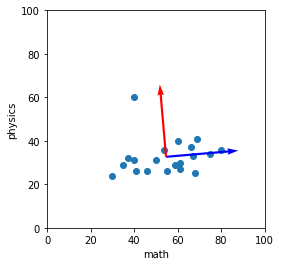

In [9]:
fig = plt.figure()#グラフオブジェクトをつくる
ax = fig.add_subplot(111,aspect='equal')#キャンバスをつくる
ax.scatter(X[:,0],X[:,1])#散布図
ax.set_xlim([0, 100])#X軸の範囲の設定
ax.set_ylim([0, 100])#Y軸の範囲の設定
ax.set_xlabel('math')#X軸の名称の設定
ax.set_ylabel('physics')#Y軸の名称の設定
ax.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0,0],pca.components_[0,1], color='b', width=0.01, scale=3)#第1主成分のベクトルを描く
ax.quiver(pca.mean_[0], pca.mean_[1], pca.components_[1,0],pca.components_[1,1], color='r', width=0.01, scale=3)#第2主成分のベクトルを描く

### 各主成分の寄与率
第一主成分で約76%説明できることがわかる。合計は1になる。

In [10]:
print("寄与率=",pca.explained_variance_ratio_)
print("合計＝", pca.explained_variance_ratio_.sum())

寄与率= [0.75917911 0.24082089]
合計＝ 1.0


### 第1主成分軸(PC1)と第2主成分軸(PC2)の2次元平面に射影する
元データから平均を引き、固有ベクトルとの行列積を計算する

In [11]:
Y = np.dot((X - pca.mean_), pca.components_.T)
Y

array([[-14.21795188,  -5.45548755],
       [-17.69083294,   0.86425114],
       [-14.78721369,  -0.38834428],
       [-25.34858374,  -6.50859448],
       [-12.31012939,  28.50566987],
       [  5.90844292,   6.87042956],
       [ -9.2362253 ,  -5.88257106],
       [  5.79437113,  -6.16747624],
       [ 12.28494322,  -0.70190455],
       [ 12.59795494,  -8.75808377],
       [ -0.26911746,  -6.65132136],
       [  6.05062123,  -3.1784403 ],
       [  3.9725139 ,  -4.00395221],
       [ 11.63026471,   3.36889341],
       [ 14.96096746,   7.09802457],
       [ -0.41129578,   3.3975485 ],
       [ -4.82376054,  -1.24251128],
       [-19.93977367,  -1.95395141],
       [ 25.49368242,   1.17671429],
       [ 20.34112245,  -0.38889284]])

In [12]:
# 新しい軸に射影されたベクトルは、fit_transform()でも求められる
X_pca = pca.fit_transform(X)
X_pca

array([[-14.21795188,  -5.45548755],
       [-17.69083294,   0.86425114],
       [-14.78721369,  -0.38834428],
       [-25.34858374,  -6.50859448],
       [-12.31012939,  28.50566987],
       [  5.90844292,   6.87042956],
       [ -9.2362253 ,  -5.88257106],
       [  5.79437113,  -6.16747624],
       [ 12.28494322,  -0.70190455],
       [ 12.59795494,  -8.75808377],
       [ -0.26911746,  -6.65132136],
       [  6.05062123,  -3.1784403 ],
       [  3.9725139 ,  -4.00395221],
       [ 11.63026471,   3.36889341],
       [ 14.96096746,   7.09802457],
       [ -0.41129578,   3.3975485 ],
       [ -4.82376054,  -1.24251128],
       [-19.93977367,  -1.95395141],
       [ 25.49368242,   1.17671429],
       [ 20.34112245,  -0.38889284]])

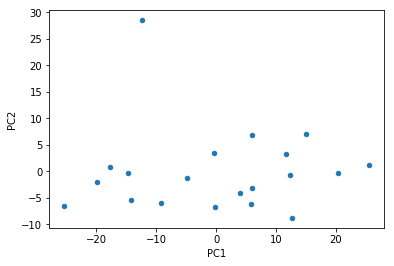

In [13]:
pd.DataFrame(Y,columns=["PC1","PC2"]).plot(kind="scatter",x="PC1",y="PC2")

### [問]
- id=4,id=5,id=8は、どの生徒も合計が100点です。第一主成分(理系軸)で評価した場合は、どの生徒の得点が高いことになりますか？

## 肺がんデータ・セットを用いた肺がん患者推定
* https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
* 診断結果の意味：M = malignant(悪性), B = benign(良性)
* 3列目以降は、細胞核のデジタル画像から算出され30個の実数値が入っている。

In [14]:
# 3列目以降は、細胞核のデジタル画像から算出され30個の実数値が入っている。
df_wdbc = pd.read_csv("../1_data/wdbc.csv",index_col=[0])
print(df_wdbc.shape)
display(df_wdbc.head())
df_wdbc  = df_wdbc.iloc[:,2:] # 3説明変数だけにする

(569, 32)


,ID,診断結果,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 各説明変数の平均値の確認

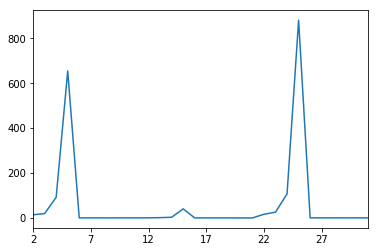

In [15]:
df_wdbc.mean().plot()

### 説明変数の標準化
平均値の大きな変数が混じっているので標準化しておく

In [16]:
stdsc = StandardScaler()
X = stdsc.fit_transform(df_wdbc)

### 主成分分析の実行

In [17]:
pca = PCA(n_components=30) #主成分分析用のオブジェクトをつくる。削減後の次元数を引数で指定する。
pca.fit(X) #主成分分析の実行

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 固有ベクトル(主成分の方向を決めるベクトル、基底)

In [18]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

### [問]
以下の計算は何を確認しているでしょうか？

In [19]:
for i in range(len(pca.components_)):
    print(np.linalg.norm(pca.components_[i]))
for i in range(len(pca.components_)):
    for r in range(len(pca.components_)):
        if i==r:
            continue
        print(np.dot(pca.components_[i], pca.components_[r]).round(5))

0.9999999999999993
1.0000000000000004
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999996
0.9999999999999994
1.0
0.9999999999999998
1.0000000000000004
0.9999999999999998
1.0000000000000007
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000004
1.0000000000000002
1.0000000000000004
0.9999999999999996
0.9999999999999997
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999996
0.9999999999999998
1.0
0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
-0.0
-0.0
0.0
-0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
0.0


### 各主成分の寄与率

In [20]:
print("寄与率=",pca.explained_variance_ratio_)
print("合計＝", pca.explained_variance_ratio_.sum())

寄与率= [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
合計＝ 1.0
